In [4]:
import numpy as np 
import scipy as scp
import matplotlib.pyplot as plt

##### Значения для величин в соответствии с вариантом задания

In [5]:
N, L, nu0 = 8, 3, 0.1

#### Задача 1.1. Прямоугольный импульс в дискретной форме

In [6]:
# Количество точек
n = 4096

# Последовательность N единичных импульсов
x_n = np.ones(N)

# ДВПФ 
dtft_x_n = np.fft.fftshift(np.fft.fft(x_n, n))
# Массив значений частоты, нормированный на количество точек
nu = np.arange(n) / (n) - 0.5

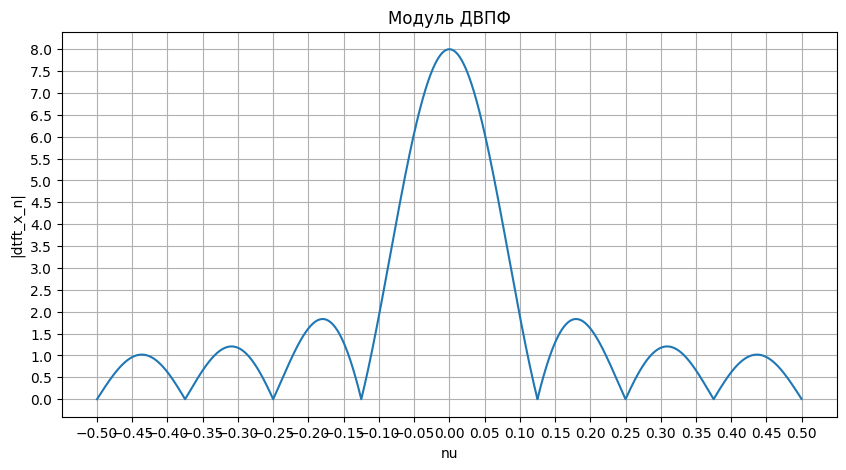

In [7]:
def plot_abs(dtft_x_n, nu, yticks = np.arange(0, 10.5, 0.5), xticks = np.arange(-0.5, 0.55, 0.05), fig=[10,5]):
    """
    График модуля 
    """
    plt.figure(figsize=fig)
    plt.xticks(xticks)
    plt.yticks(yticks)
    
    plt.grid()
    plt.title('Модуль ДВПФ')
    plt.xlabel('nu')
    plt.ylabel('|dtft_x_n|')
    
    plt.plot(nu, np.abs(dtft_x_n))

plot_abs(dtft_x_n, nu)

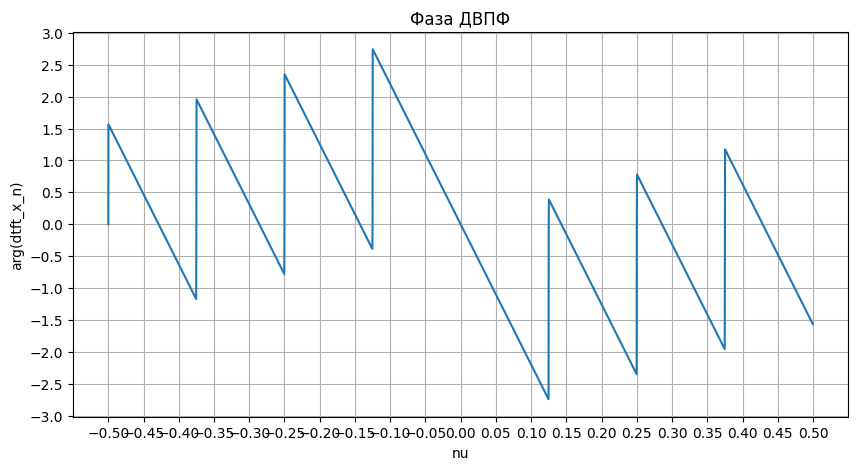

In [8]:
def plot_angle(dtft_x_n, nu):
    """
    График фазы
    """
    plt.figure(figsize=[10,5])
    plt.xticks(np.arange(-0.7, 0.75, 0.05))
    plt.yticks(np.arange(-3, 3.5, 0.5))
    
    plt.grid()
    plt.title('Фаза ДВПФ')
    plt.xlabel('nu')
    plt.ylabel('arg(dtft_x_n)')
    
    plt.plot(nu, np.angle(dtft_x_n))

plot_angle(dtft_x_n, nu)

In [9]:
# X(0)
print(max(abs(dtft_x_n)))

8.0


In [10]:
# Ширина главного лепестка на нулевом уровне
zeros = []
for ind in range(len(nu)):
    if (abs(dtft_x_n))[ind] == 0:
        zeros.append(nu[ind])
        
left  = [zero for zero in zeros if zero < 0]
right = [zero for zero in zeros if zero > 0]

width = right[0] - left[-1]
print(width)

0.25


In [11]:
# Точки скачков фазы на Pi/2?
deltas = []
for ind in range(len(nu)-1):
    if abs(np.angle(dtft_x_n)[ind+1] - np.angle(dtft_x_n)[ind]) > np.pi/2:
        deltas.append(nu[ind] if nu[ind] < 0 else nu[ind+1])
print(deltas)

[-0.375, -0.25, -0.125, 0.125, 0.25, 0.375]


In [12]:
# Квадрат энергии
I = np.trapz([y*y for y in abs(dtft_x_n)], nu)
print(I)

7.999999995404163


#### Задача 1.2. Свойство масштабирования

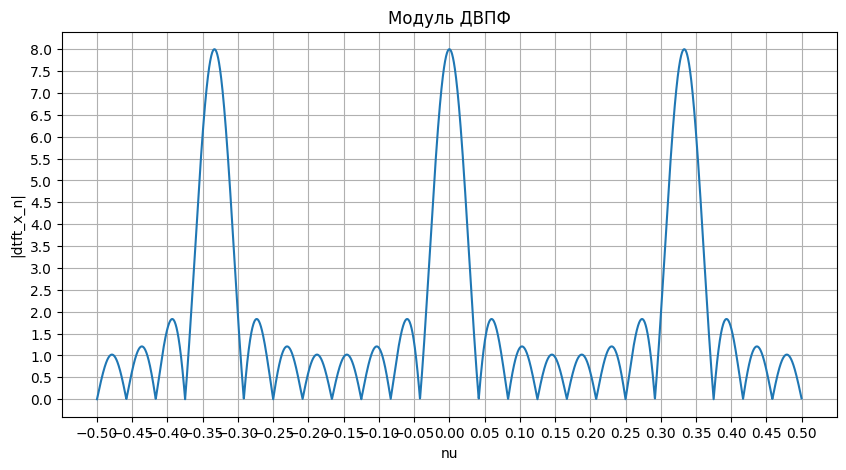

In [13]:
# Последовательность с добавленными нулями
xl_n = np.zeros(L * (N-1) + 1)
for ind in range(L * (N-1) + 1):
    if ind % 3 == 0:
        xl_n[ind] = 1
# ДВПФ
dtft_xl_n = np.fft.fftshift(np.fft.fft(xl_n, n))
plot_abs(dtft_xl_n, nu)

#### Задача 1.3. Дифференцирование спектральной плотности

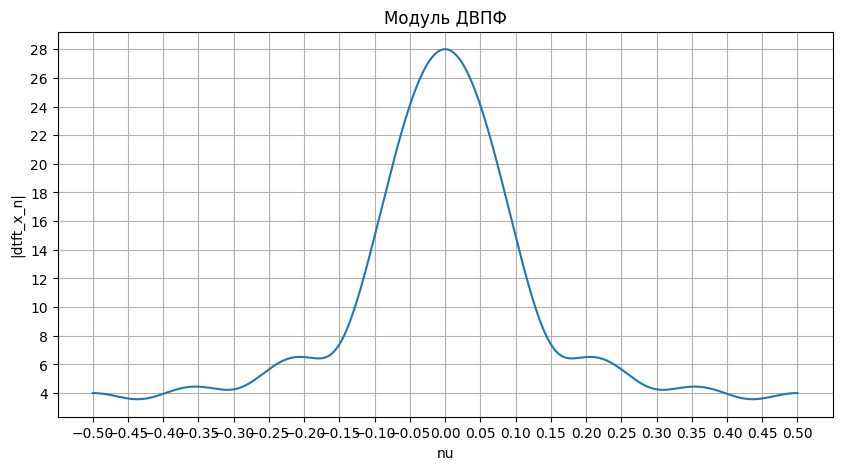

In [14]:
xd_n = [ind * x_n[ind] for ind in range(len(x_n))]
# ДВПФ
dtft_xd_n = np.fft.fftshift(np.fft.fft(xd_n, n))
plot_abs(dtft_xd_n, nu, np.arange(0, 100, 2))

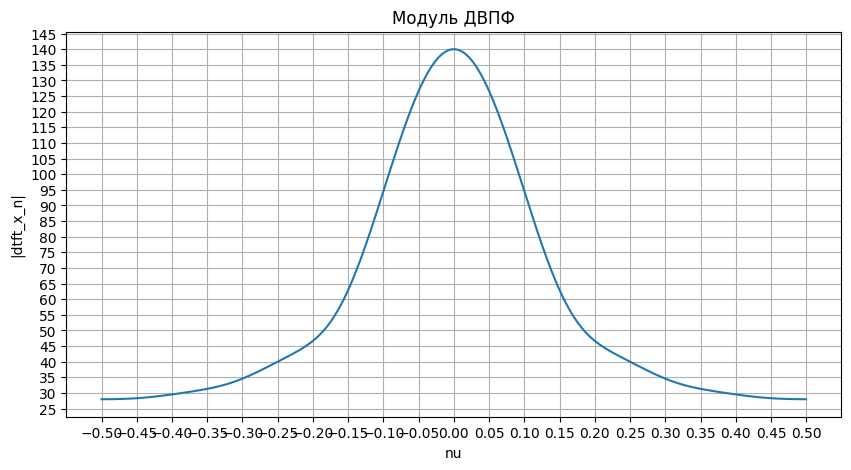

In [15]:
xd2_n = [ind * ind * x_n[ind] for ind in range(len(x_n))]
# ДВПФ
dtft_xd2_n = np.fft.fftshift(np.fft.fft(xd2_n, n))
plot_abs(dtft_xd2_n, nu, np.arange(0, 160, 5))

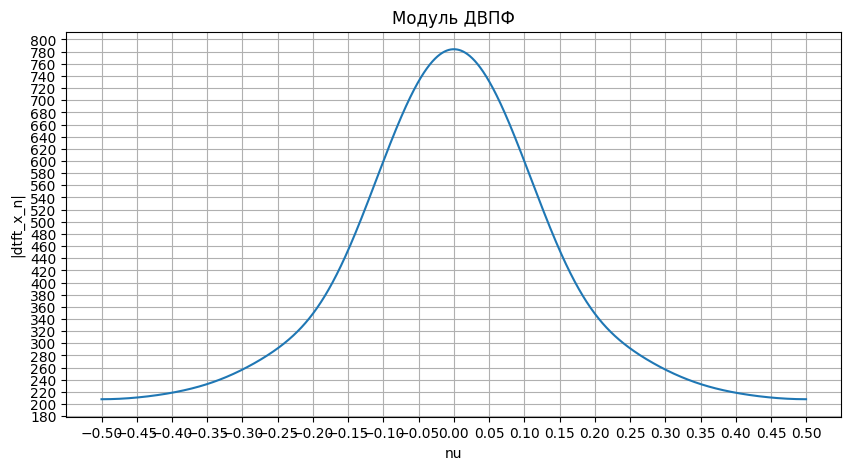

In [16]:
xd3_n = [ind * ind * ind * x_n[ind] for ind in range(len(x_n))]
# ДВПФ
dtft_xd3_n = np.fft.fftshift(np.fft.fft(xd3_n, n))
plot_abs(dtft_xd3_n, nu, np.arange(0, 1000, 20))

#### Задача 1.4. Теорема смещения

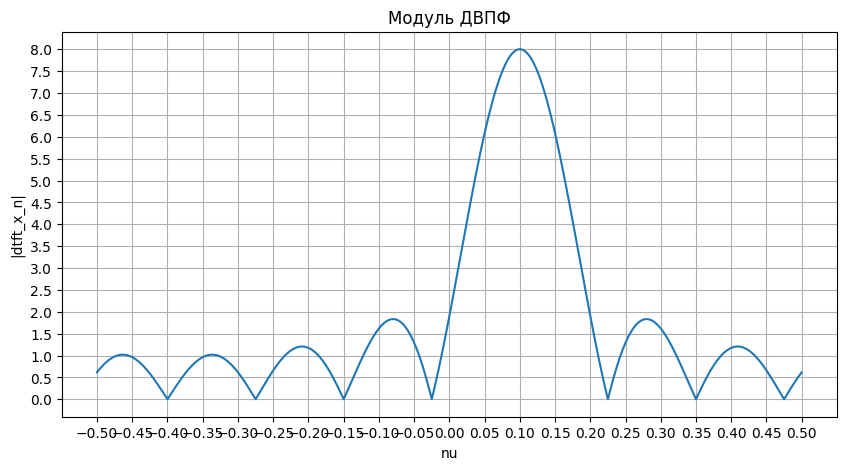

In [17]:
xs_n = [np.exp(1j * 2 * np.pi * nu0 * ind) for ind in range(len(x_n))]
dtft_xs_n = np.fft.fftshift(np.fft.fft(xs_n, n))
plot_abs(dtft_xs_n, nu)

#### Задача 1.5. Теорема о свертке во временной области

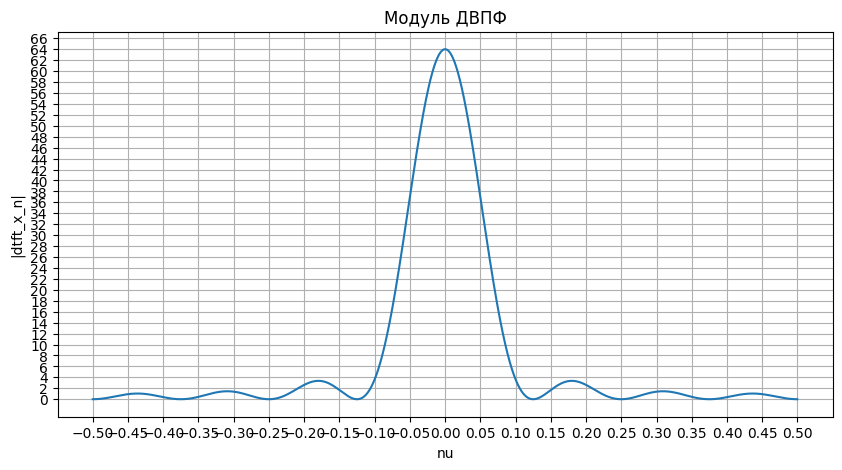

In [18]:
xm_n = scp.signal.convolve(x_n, x_n)
dtft_xm_n = np.fft.fftshift(np.fft.fft(xm_n, n))
plot_abs(dtft_xm_n, nu, np.arange(0, 70, 2))

In [19]:
# X(0)
print(max(abs(dtft_xm_n)))

64.0


In [20]:
# Ширина главного лепестка на нулевом уровне
zeros = []
for ind in range(len(nu)):
    if (abs(dtft_xm_n))[ind] == 0:
        zeros.append(nu[ind])
        
left  = [zero for zero in zeros if zero < 0]
right = [zero for zero in zeros if zero > 0]

width = right[0] - left[-1]
print(width)

0.25


In [21]:
# Квадрат энергии
I = np.trapz([y*y for y in abs(dtft_xm_n)], nu)
print(I)

343.99999999999983


#### Контрольные вопросы 

#### №5

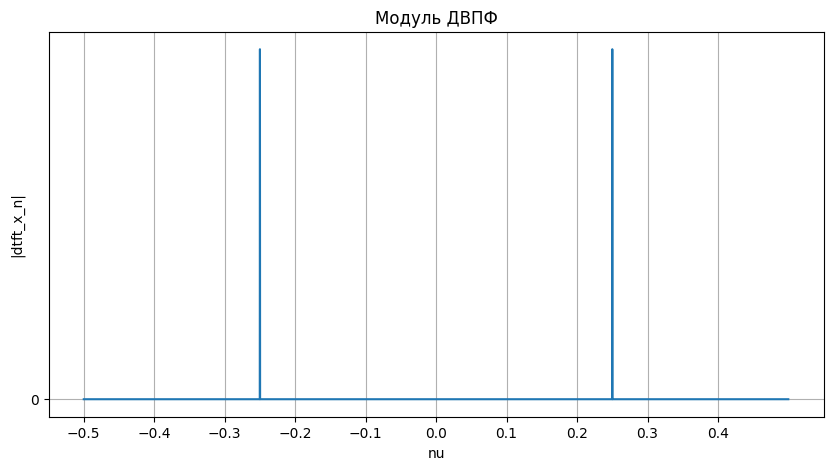

In [22]:
f_d = 1000
f0 = 250
delta_t = 1 / f_d

d_signal = [delta_t * np.cos(2 * np.pi * k * delta_t * f0) for k in range(n)]

dtft = np.fft.fftshift(np.fft.fft(d_signal, n))
freq = np.arange(n) / (n) - 0.5
plot_abs(dtft, freq, np.arange(0, 100, 5), np.arange(-0.5, 0.5, 0.1))

#### 2.1 Алгоритмы вычисления ДПФ

In [23]:
x_k = [1, -6, 0, -5, 6, -7, 0, 9]
m = -4

##### Матричная форма ДПФ

In [24]:
W = scp.linalg.dft(len(x_k))
dft_matrix = W @ x_k

##### БПФ

In [25]:
dft_fft = np.fft.fft(x_k)

In [26]:
for ind in range(len(x_k)):
    if abs(dft_matrix[ind]-dft_fft[ind]) > 1E-9:
        print("Results does not match")

#### 2.2 Свойства симметрии ДПФ

##### Re(X[n])

<StemContainer object of 3 artists>

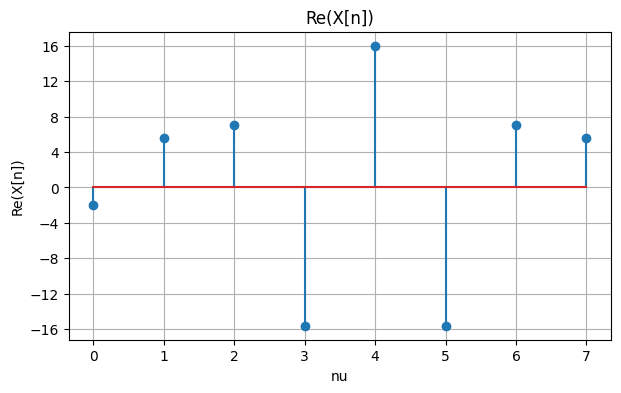

In [27]:
plt.figure(figsize=[7,4])
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(-16, +17, 4))

plt.grid()
plt.title('Re(X[n])')
plt.xlabel('nu')
plt.ylabel('Re(X[n])')

plt.stem(range(8), dft_fft.real)

##### Im(X[n])

<StemContainer object of 3 artists>

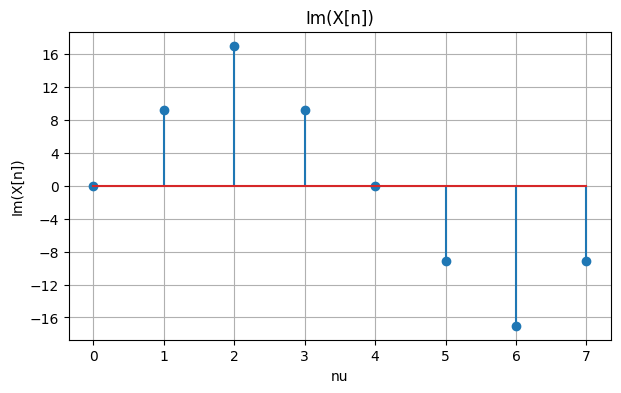

In [28]:
plt.figure(figsize=[7,4])
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(-16, +17, 4))

plt.grid()
plt.title('Im(X[n])')
plt.xlabel('nu')
plt.ylabel('Im(X[n])')

plt.stem(range(8), dft_fft.imag)

##### |X[n]|

<StemContainer object of 3 artists>

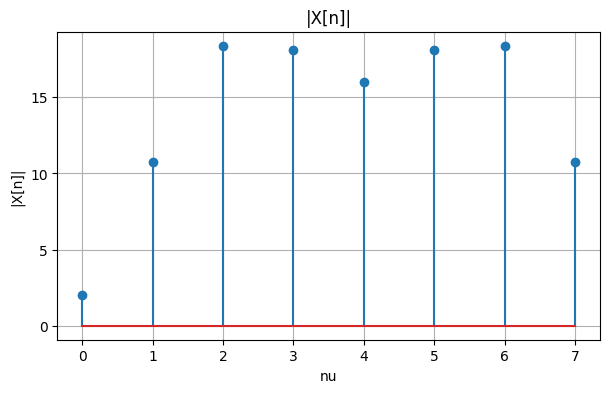

In [29]:
plt.figure(figsize=[7,4])
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(0, 31, 5))

plt.grid()
plt.title('|X[n]|')
plt.xlabel('nu')
plt.ylabel('|X[n]|')

plt.stem(range(8), np.abs(dft_fft))

##### angle(X[n])

<StemContainer object of 3 artists>

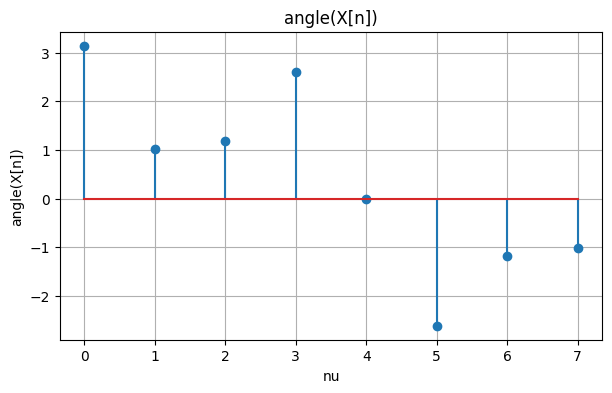

In [30]:
plt.figure(figsize=[7,4])
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(-5, 5, 1))

plt.grid()
plt.title('angle(X[n])')
plt.xlabel('nu')
plt.ylabel('angle(X[n])')

plt.stem(range(8), np.angle(dft_fft))

#### 2.3 Циклический сдвиг в ДПФ

In [31]:
X_n = np.fft.fft(x_k)
Y_n = [np.exp(-1j * 2 * np.pi * m * n / 8) * X_n[n] for n in range(len(X_n))]

y_k = [round(y) for y in np.fft.ifft(Y_n).real]

print(x_k)
print(y_k)

[1, -6, 0, -5, 6, -7, 0, 9]
[6, -7, 0, 9, 1, -6, 0, -5]


#### 3.1. Интерполяция ДВПФ добавлением нулевых отсчетов в сигнал

In [32]:
m0 = 5
m1 = 0.6

<StemContainer object of 3 artists>

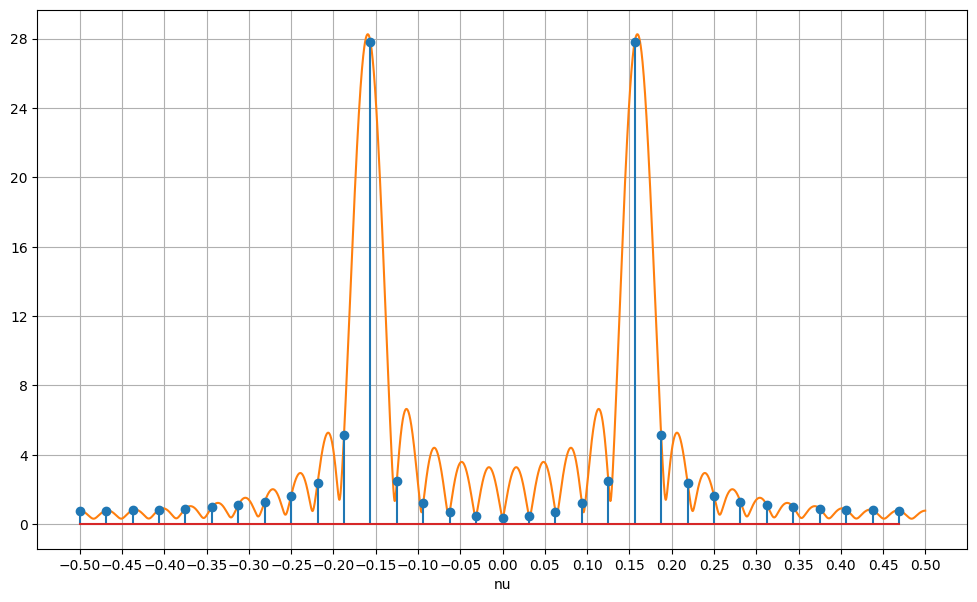

In [33]:
N = 32

k = np.arange(N)
x_k = [np.sin(2 * np.pi * m0 * k / N) + np.sin(2 * np.pi * (m0 + 0.25) * k / N) for k in k]

dtft_x_k = np.fft.fftshift(np.fft.fft(x_k, n))
dft_x_k  = np.fft.fftshift(np.fft.fft(x_k, N))

plt.figure(figsize=[12,7])
plt.xticks(np.arange(-0.5, 0.55, 0.05))
plt.yticks(np.arange(0, 36, 4))

plt.grid()
plt.xlabel('nu')
           
plt.plot(np.arange(n)/n - 0.5, np.abs(dtft_x_k), 'C1')
plt.stem(np.arange(N)/N - 0.5, np.abs(dft_x_k))

<StemContainer object of 3 artists>

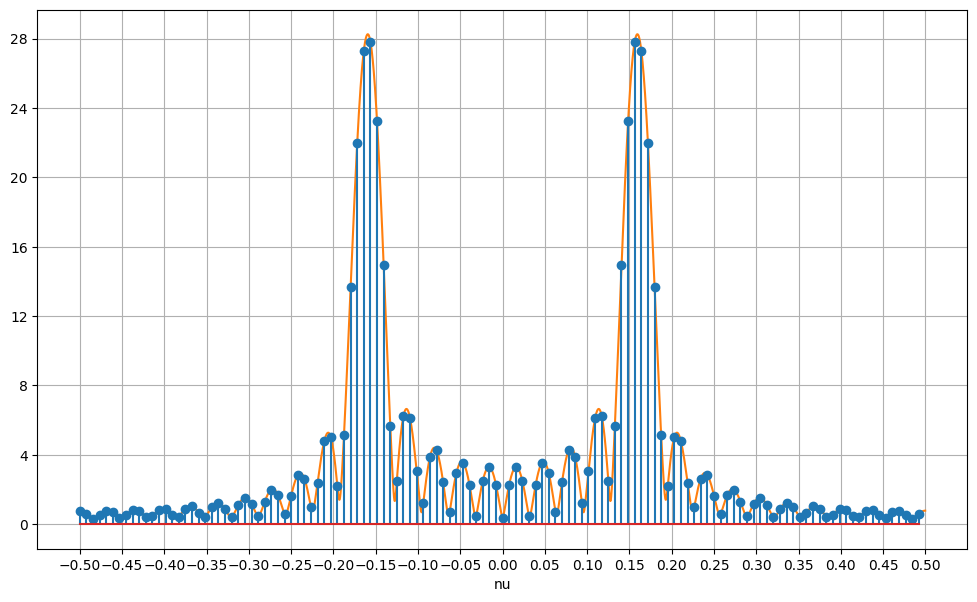

In [34]:
M = 96
N = N + M # N = 32 + 96 = 128

dtft_x_k = np.fft.fftshift(np.fft.fft(x_k, n))
dft_x_k  = np.fft.fftshift(np.fft.fft(x_k, N))

plt.figure(figsize=[12,7])
plt.xticks(np.arange(-0.5, 0.55, 0.05))
plt.yticks(np.arange(0, 36, 4))

plt.grid()
plt.xlabel('nu')
           
plt.plot(np.arange(n)/n - 0.5, np.abs(dtft_x_k), 'C1')
plt.stem(np.arange(N)/N - 0.5, np.abs(dft_x_k))

#### 3.2. ДВПФ и ДПФ периодической последовательсти

In [35]:
m = m0
N = 32

k = np.arange(N)
x_k = [np.sin(2 * np.pi * m * k / N) + np.cos(2 * np.pi * m * k / N) for k in k]

X_n = np.fft.fft(x_k) / N

<StemContainer object of 3 artists>

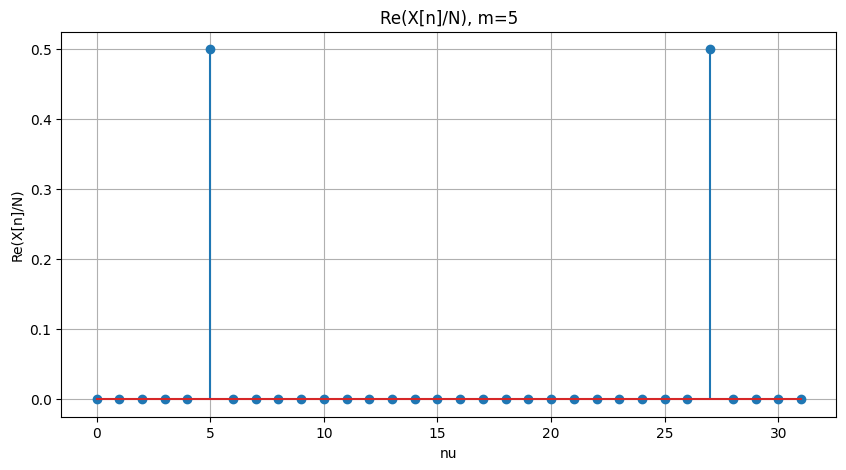

In [36]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('Re(X[n]/N)')
plt.title('Re(X[n]/N), m=5')

plt.stem(k, X_n.real)

<StemContainer object of 3 artists>

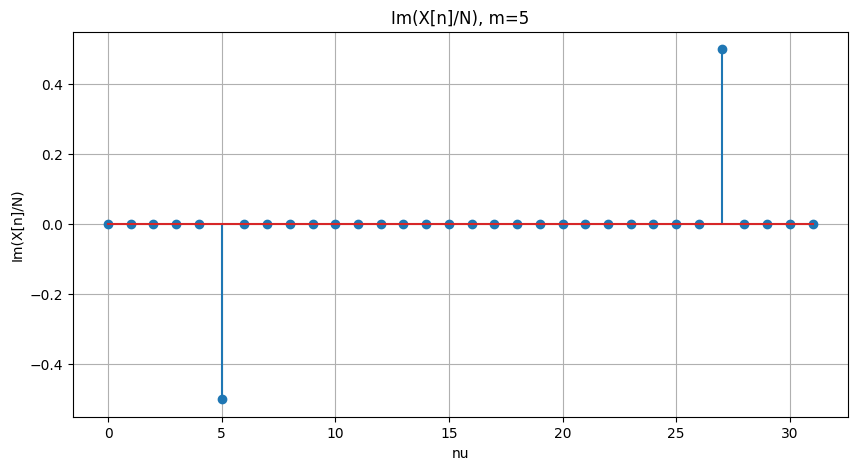

In [37]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('Im(X[n]/N)')
plt.title('Im(X[n]/N), m=5')

plt.stem(k, X_n.imag)

In [38]:
m = m0 + m1
x_k = [np.sin(2 * np.pi * m * k / N) + np.cos(2 * np.pi * m * k / N) for k in k]
X_n = np.fft.fft(x_k) / N

<StemContainer object of 3 artists>

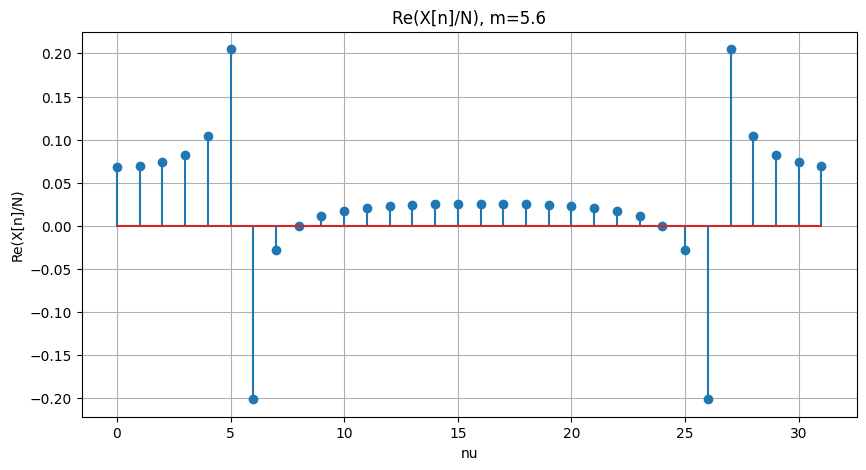

In [39]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('Re(X[n]/N)')
plt.title('Re(X[n]/N), m=5.6')

plt.stem(k, X_n.real)

<StemContainer object of 3 artists>

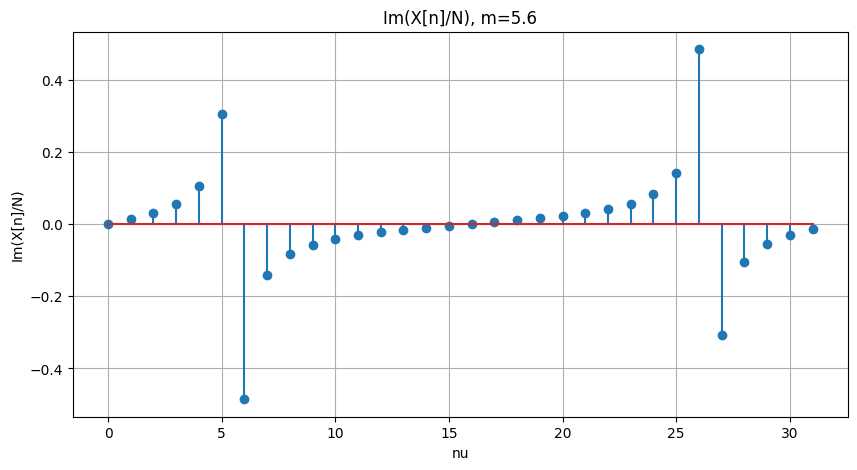

In [40]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('Im(X[n]/N)')
plt.title('Im(X[n]/N), m=5.6')

plt.stem(k, X_n.imag)

#### Контрольные вопросы

#### №

In [50]:
nu0 = 0.2
N = int(1/nu0)

x1_k = [np.cos(2 * np.pi * k * nu0) for k in range(N)]
x2_k = [np.sin(2 * np.pi * k * nu0) for k in range(N)]

X1_n = np.fft.fft(x1_k) / N
X2_n = np.fft.fft(x2_k) / N

<StemContainer object of 3 artists>

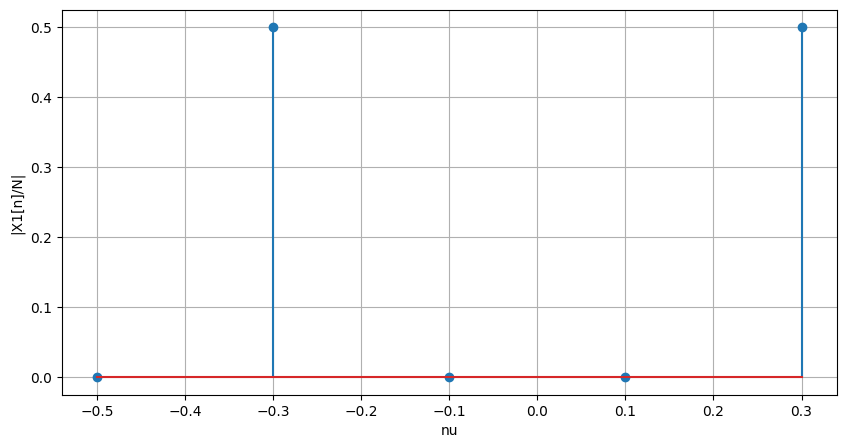

In [53]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('|X1[n]/N|')

plt.stem(np.arange(N)/N-0.5, abs(X1_n))

<StemContainer object of 3 artists>

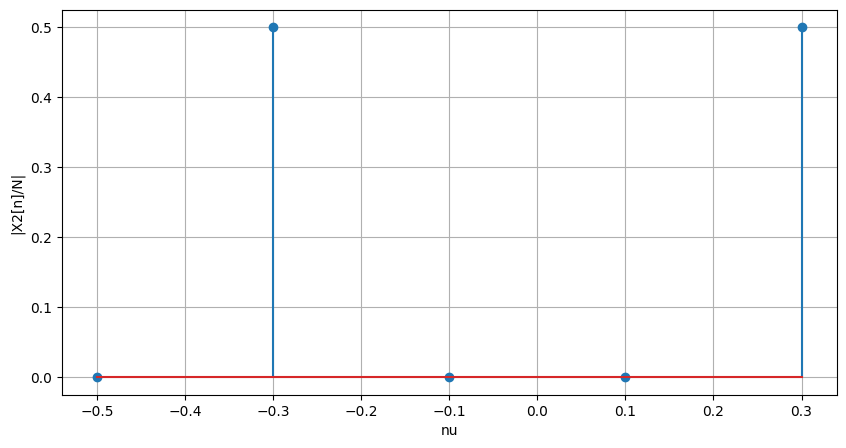

In [54]:
plt.figure(figsize=[10,5])

plt.grid()
plt.xlabel('nu')
plt.ylabel('|X2[n]/N|')

plt.stem(np.arange(N)/N-0.5, abs(X2_n))